<a href="https://colab.research.google.com/github/KingAgastya/Decision-Tree-Titanic/blob/main/Decision_Tree_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
fileData = files.upload()

Saving data.csv to data.csv


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from six import StringIO
from IPython.display import Image
import pydotplus

In [ ]:
columnNames = ['PassengerId','Pclass','Sex','Age','SibSp','Parch','Survived']

fileInfo = pd.read_csv('data.csv', names = columnNames).iloc[1:]

factors = ['PassengerId','Pclass','Sex','Age','SibSp','Parch']
print(fileInfo.head())

In [6]:
x = fileInfo[factors]
y = fileInfo['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)
classifier = DecisionTreeClassifier()
classifier = classifier.fit(x_train, y_train)
y_prediction = classifier.predict(x_test)
accuracy_score = metrics.accuracy_score(y_test, y_prediction)

print(accuracy_score)

0.7282913165266106


digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label=<Sex &le; 0.5<br/>gini = 0.476<br/>samples = 534<br/>value = [325, 209]>, fillcolor="#f6d2b8"] ;
1 [label=<Pclass &le; 2.5<br/>gini = 0.382<br/>samples = 187<br/>value = [48, 139]>, fillcolor="#7dbfee"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<Age &le; 0.5<br/>gini = 0.075<br/>samples = 103<br/>value = [4, 99]>, fillcolor="#41a1e6"] ;
1 -> 2 ;
3 [label=<PassengerId &le; 50.5<br/>gini = 0.26<br/>samples = 13<br/>value = [2, 11]>, fillcolor="#5dafea"] ;
2 -> 3 ;
4 [label=<gini = 0.0<br/>samples = 1<br/>value = [1, 0]>, fillcolor="#e58139"] ;
3 -> 4 ;
5 [label=<PassengerId &le; 302.0<br/>gini = 0.153<br/>samples = 12<br/>value = [1, 11]>, fillcolor="#4ba6e7"] ;
3 -> 5 ;
6 [label=<gini = 0.0<br/>samples = 8<br/>value = [0, 8]>, fillcolor="#399de5"] ;
5 -> 6 ;
7 [label=<PassengerId &le; 340.0<br/>gini = 0.375<br/>samples = 4<

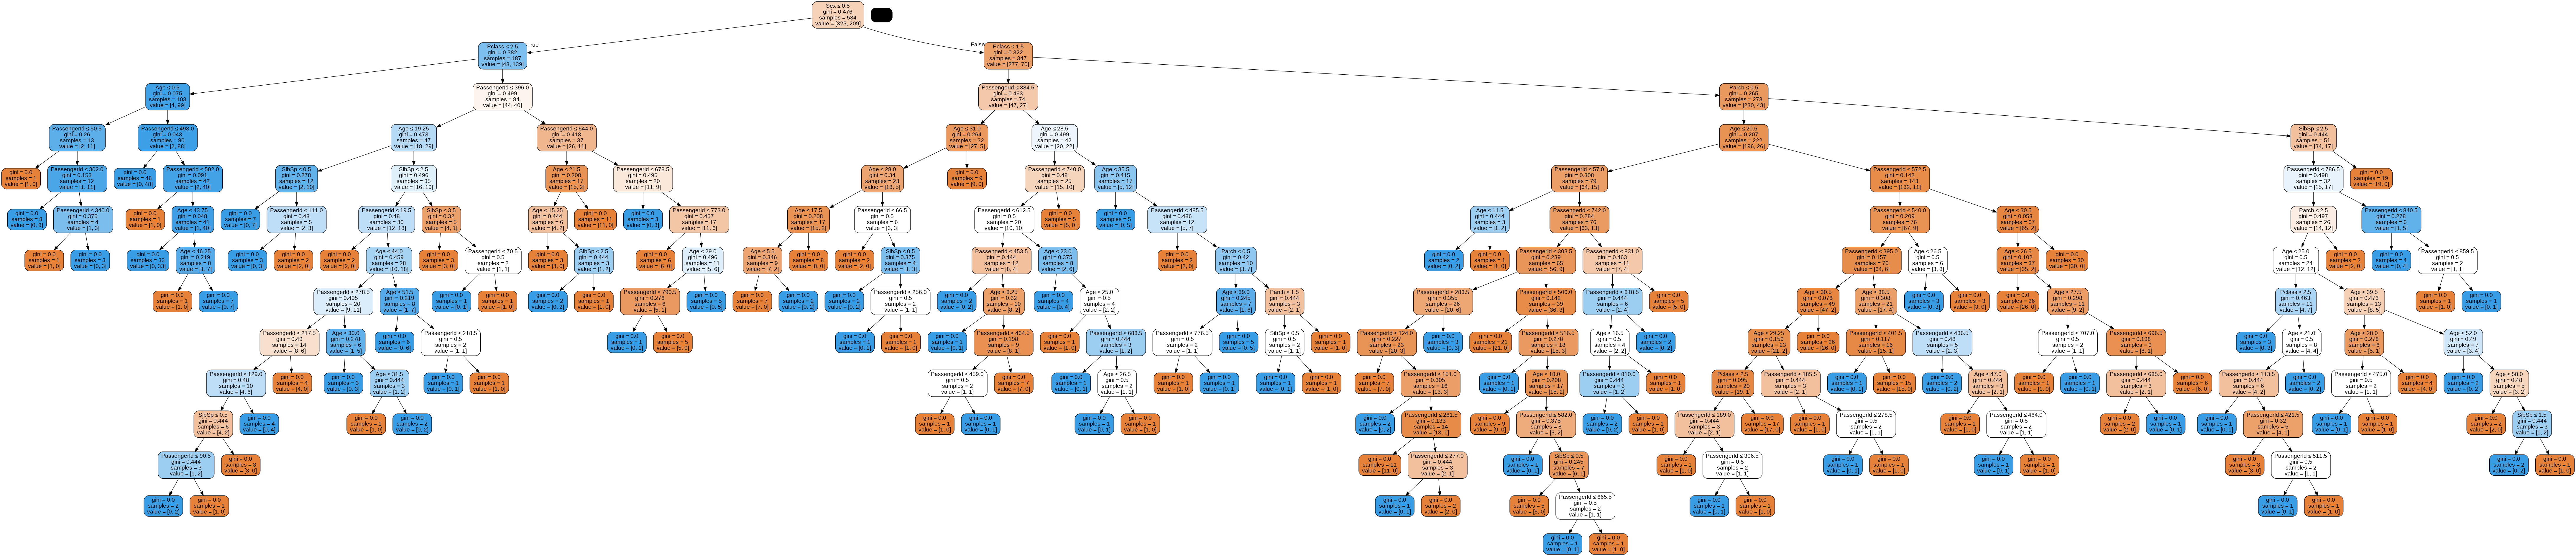

In [7]:
dotdata = StringIO()
export_graphviz(classifier, out_file = dotdata, filled = True, rounded = True, special_characters = True, feature_names = factors)
print(dotdata.getvalue())

graph = pydotplus.graph_from_dot_data(dotdata.getvalue())
graph.write_png('Titanic')
Image(graph.create_png())

0.7843137254901961
digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label=<Sex &le; 0.5<br/>gini = 0.476<br/>samples = 534<br/>value = [325, 209]>, fillcolor="#f6d2b8"] ;
1 [label=<Pclass &le; 2.5<br/>gini = 0.382<br/>samples = 187<br/>value = [48, 139]>, fillcolor="#7dbfee"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<Age &le; 0.5<br/>gini = 0.075<br/>samples = 103<br/>value = [4, 99]>, fillcolor="#41a1e6"] ;
1 -> 2 ;
3 [label=<gini = 0.26<br/>samples = 13<br/>value = [2, 11]>, fillcolor="#5dafea"] ;
2 -> 3 ;
4 [label=<gini = 0.043<br/>samples = 90<br/>value = [2, 88]>, fillcolor="#3d9fe6"] ;
2 -> 4 ;
5 [label=<PassengerId &le; 396.0<br/>gini = 0.499<br/>samples = 84<br/>value = [44, 40]>, fillcolor="#fdf4ed"] ;
1 -> 5 ;
6 [label=<gini = 0.473<br/>samples = 47<br/>value = [18, 29]>, fillcolor="#b4daf5"] ;
5 -> 6 ;
7 [label=<gini = 0.418<br/>samples = 37<br/>value = [26, 11]>, 

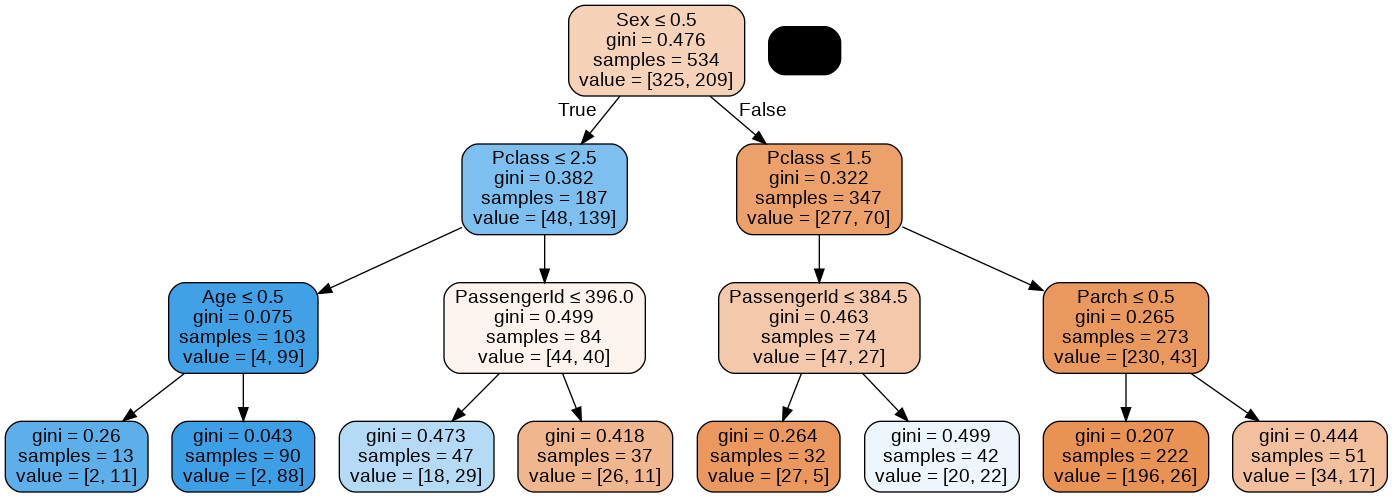

In [8]:
classifier = DecisionTreeClassifier(max_depth = 3)
classifier = classifier.fit(x_train, y_train)
y_prediction = classifier.predict(x_test)
accuracy_score = metrics.accuracy_score(y_test, y_prediction)

print(accuracy_score)

dotdata = StringIO()
export_graphviz(classifier, out_file = dotdata, filled = True, rounded = True, special_characters = True, feature_names = factors)
print(dotdata.getvalue())

graph = pydotplus.graph_from_dot_data(dotdata.getvalue())
graph.write_png('Titanic')
Image(graph.create_png())